# How to plot a CNN

## Short tutorial on CNN representation

Prerequisites:
- 1) install Pycharm and Anaconda http://confluence.xilinx.com/pages/viewpage.action?pageId=97208942
- 2) add all needed packages (i.e. Keras)
- 3) install graphviz in your PC


In [1]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K


Using TensorFlow backend.


Now we can build the CNN. Let's create a class for each CNN, MiniVGGNet and LeNet.
The CNN size will be passed thanks to the build function inside the class.

In [2]:

class MiniVGGNet:
	@staticmethod
	def build(width, height, depth, classes):
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		return model

class LeNet:
	@staticmethod
	def build(width, height, depth, classes):
		model = Sequential()
		inputShape = (height, width, depth)
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
		model.add(Conv2D(20, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		model.add(Conv2D(50, (5, 5), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
		model.add(Flatten())
		model.add(Dense(500))
		model.add(Activation("relu"))
		model.add(Dense(classes))
		model.add(Activation("softmax"))
		return model

Finally, let's plot the CNN. Remember you need to have Graphwiz installed

In [3]:
from keras.utils import plot_model
import os
os.chdir("C:\Temp")

# initialize LeNet and then write the network architecture
# visualization grpah to disk
model = LeNet.build(30, 30, 1, 5)
plot_model(model, to_file="lenet.png", show_shapes=True)

model = MiniVGGNet.build(30, 30, 3, 10)
plot_model(model, to_file="minivggnet.png", show_shapes=True)


The CNN topology will be saved in C:\Temp directory.
Yo might also  directly obtain the pydot.Graph object and render it yourself, for example to show it in an ipython notebook. The .png picture is however more complete.

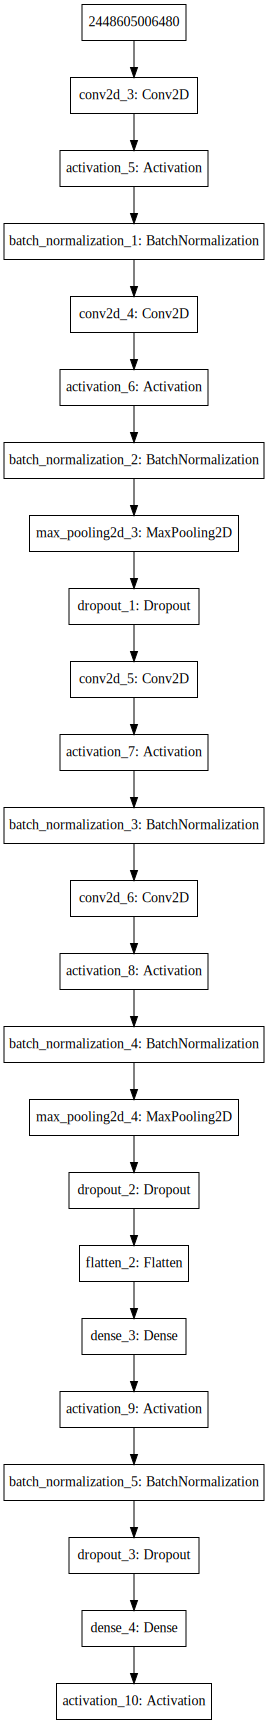

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))
